In [31]:

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


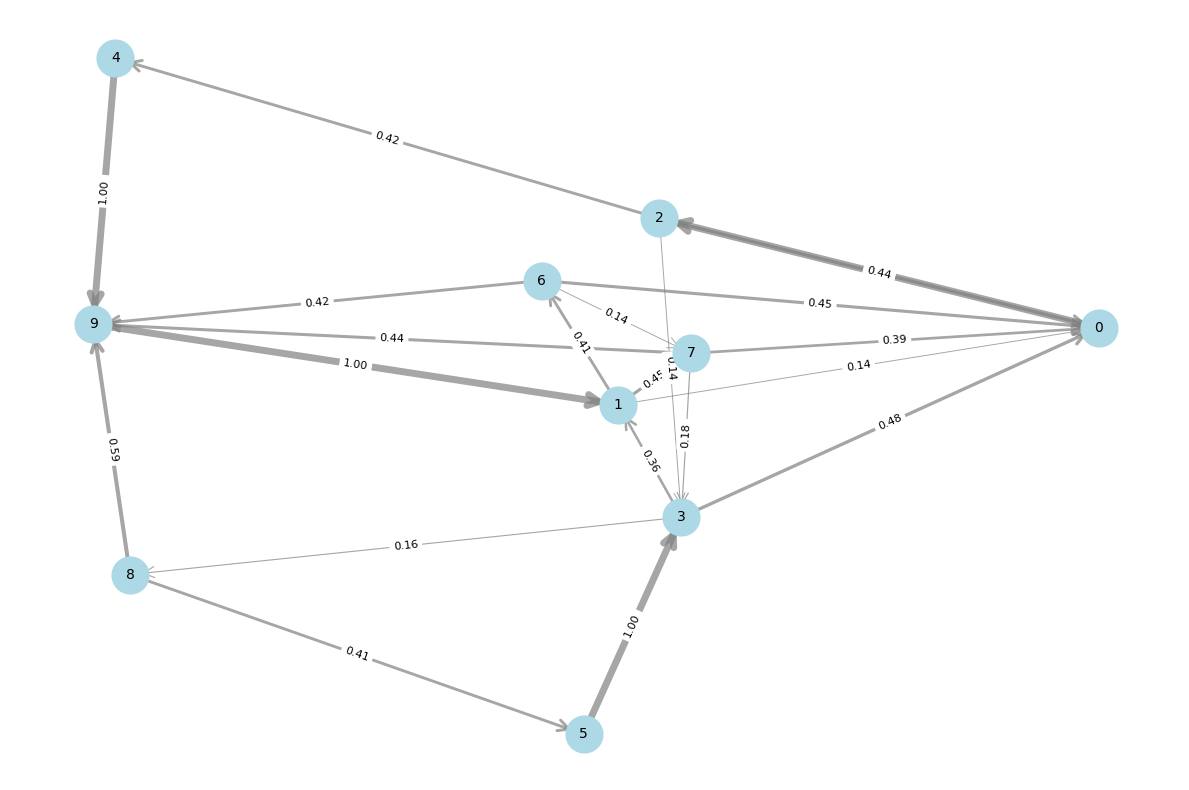

In [32]:
from graphverse.graph.graph_generation import (
    calculate_edge_density,
    generate_random_graph,
    load_graph,
    save_graph,
)
from graphverse.vis.graph_draw_nx import visualize_graph

G = load_graph("my_graph.gml")
visualize_graph(G)

In [33]:
from graphverse.graph.rules import instantiate_all_rules

In [39]:
import math
import random

import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import torch

from graphverse.data.preparation import prepare_training_data
from graphverse.graph.graph_generation import (
    calculate_edge_density,
    generate_random_graph,
)
from graphverse.graph.rules import (
    AscenderRule,
    DescenderRule,
    EvenRule,
    OddRule,
    RepeaterRule,
    define_all_rules,
    instantiate_all_rules
)
from graphverse.llm.evaluation import evaluate_model
from graphverse.llm.training import train_model

from graphverse.graph.walk import generate_multiple_walks




n = 10
num_walks = 100
min_walk_length = 5
max_walk_length = 20
num_repeaters = 3
repeater_min_steps = 3
repeater_max_steps = 10
epochs = 10
batch_size = 32
learning_rate = 0.001
verbose = True




if verbose:
    print("Selecting vertices with rules")
# ascenders, descenders, evens, odds, repeaters = define_all_rules(
#     n, num_repeaters, repeater_min_steps, repeater_max_steps
# )
# rules = (ascenders, descenders, evens, odds, repeaters)

rules = instantiate_all_rules(n, num_repeaters, repeater_min_steps, repeater_max_steps)

# Generate graph
if verbose:
    print("Generating graph")
G = generate_random_graph(
    n, rules, verbose=verbose
)

if verbose:
    print(f"Graph created")
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    print(f"Is strongly connected: {nx.is_strongly_connected(G)}")
    print(f"Is weakly connected: {nx.is_weakly_connected(G)}")
    print(f"Now preparing training data")

# Prepare training data
walks = generate_multiple_walks(
    G, num_walks, min_walk_length, max_walk_length, rules, verbose=verbose
)
# training_data, vocab = prepare_training_data(G, walks, rules, verbose=verbose)
training_data, vocab = prepare_training_data(
    G, num_walks, min_walk_length, max_walk_length, rules, verbose=False
)
if verbose:
    print(f"Training data prepared")

# Train model
if verbose:
    print(f"Training model")
model = train_model(
    training_data, vocab, epochs, batch_size, learning_rate, verbose=verbose
)
if verbose:
    print(f"Model trained")

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Training data prepared
Training model
Epoch 1/10, Loss: 3.2496
Epoch 2/10, Loss: 3.2101
Epoch 3/10, Loss: 2.4856
Epoch 4/10, Loss: 2.4615
Epoch 5/10, Loss: 2.3469
Epoch 6/10, Loss: 2.2482
Epoch 7/10, Loss: 2.2867
Epoch 8/10, Loss: 2.1875
Epoch 9/10, Loss: 2.4042
Epoch 10/10, Loss: 2.3901
Model trained


In [41]:
G.edges

OutEdgeView([(0, 2), (0, 9), (0, 8), (0, 7), (0, 4), (0, 3), (0, 6), (0, 5), (0, 1), (1, 7), (1, 1), (1, 9), (1, 5), (1, 3), (2, 8), (2, 6), (2, 9), (2, 1), (2, 5), (2, 4), (2, 2), (2, 0), (2, 3), (2, 7), (3, 7), (3, 2), (3, 0), (3, 8), (3, 9), (3, 1), (3, 6), (3, 5), (3, 4), (4, 7), (4, 9), (4, 2), (4, 6), (4, 5), (4, 0), (4, 8), (4, 3), (4, 1), (5, 6), (5, 7), (5, 2), (5, 1), (5, 3), (5, 0), (5, 9), (5, 4), (5, 8), (5, 5), (6, 4), (6, 2), (6, 0), (6, 8), (6, 6), (7, 7), (7, 5), (7, 4), (7, 9), (7, 3), (7, 1), (7, 0), (7, 2), (7, 6), (7, 8), (8, 0), (8, 4), (8, 8), (8, 2), (8, 6), (8, 5), (8, 3), (8, 9), (8, 1), (8, 7), (9, 5), (9, 2), (9, 9), (9, 7), (9, 1), (9, 4), (9, 8), (9, 3), (9, 6), (9, 0)])

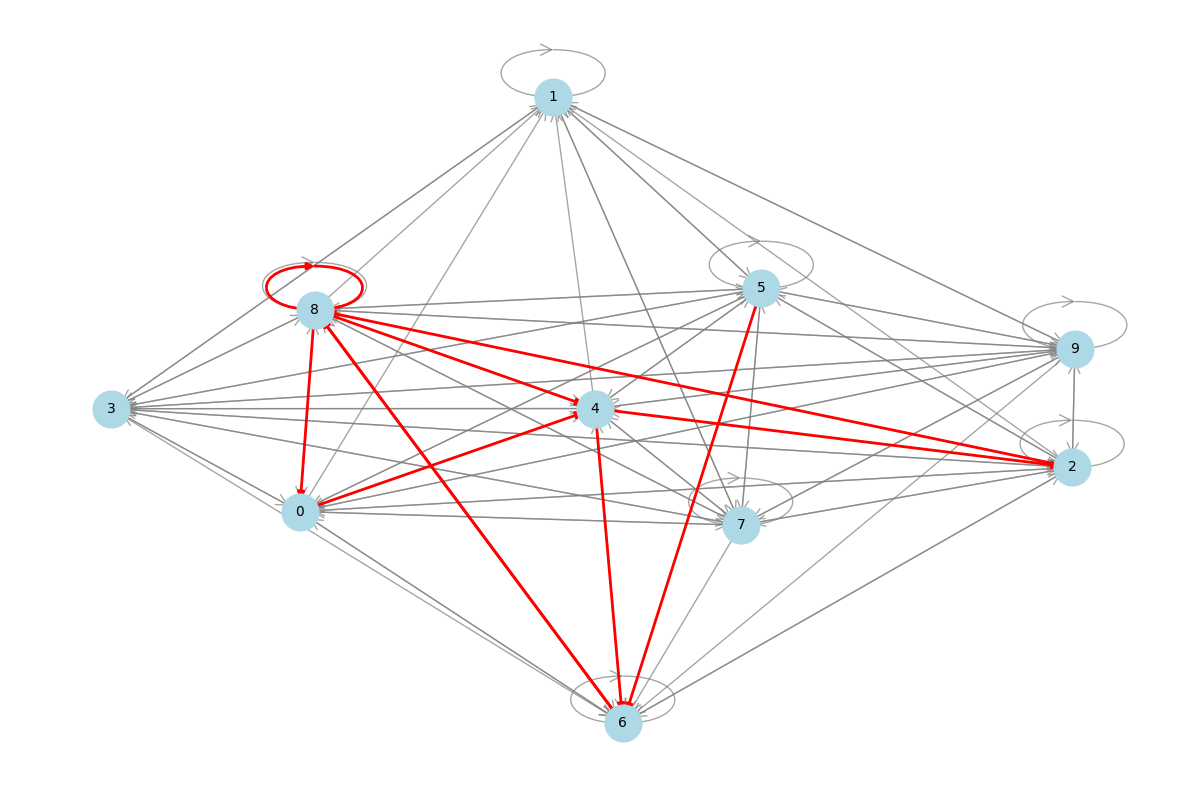

In [44]:
def visualize_graph(G, walk=None):
    # Create a new figure
    plt.figure(figsize=(12, 8))

    # Generate a layout for the nodes
    pos = nx.spring_layout(G)

    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color="lightblue")

    # Draw the edges with varying thickness based on probability
    for u, v, data in G.edges(data=True):
        nx.draw_networkx_edges(
            G,
            pos,
            edgelist=[(u, v)],
            width=1, #data["probability"] * 5,
            alpha=0.7,
            edge_color="gray",
            arrows=True,
            arrowsize=20,
            arrowstyle="->",
        )

    # Draw the node labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

    # Draw the edge labels (probabilities)
    # edge_labels = nx.get_edge_attributes(G, "probability")
    # edge_labels = {k: f"{v:.2f}" for k, v in edge_labels.items()}
    # nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    if walk is not None:
        edge_list = [(walk[i], walk[i+1]) for i in range(len(walk)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=edge_list, edge_color='r', width=2)

    # Remove axis
    plt.axis("off")

    # Show the plot
    plt.tight_layout()
    plt.show()
    return


visualize_graph(G, walks[0])